In [3]:
# Simple machine learning project, 
# Objective : predict iris species from the iris flower dataset using classification model. "Decision Tree"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [5]:
iris_data = pd.read_csv('E:\Data Science\Python\machine learning exercise\dataset\IRIS.csv')

In [6]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [11]:
X_train.shape

(120, 4)

In [12]:
X_test.shape

(30, 4)

### Machine learning model 'Decision Tree'

In [13]:
DT = DecisionTreeClassifier(max_depth=4)

In [14]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [15]:
'Train Accuracy : ', DT.score(X_train, y_train)

('Train Accuracy : ', 0.9916666666666667)

In [16]:
'Test Accuarcy : ', DT.score(X_test, y_test)

('Test Accuarcy : ', 0.9666666666666667)

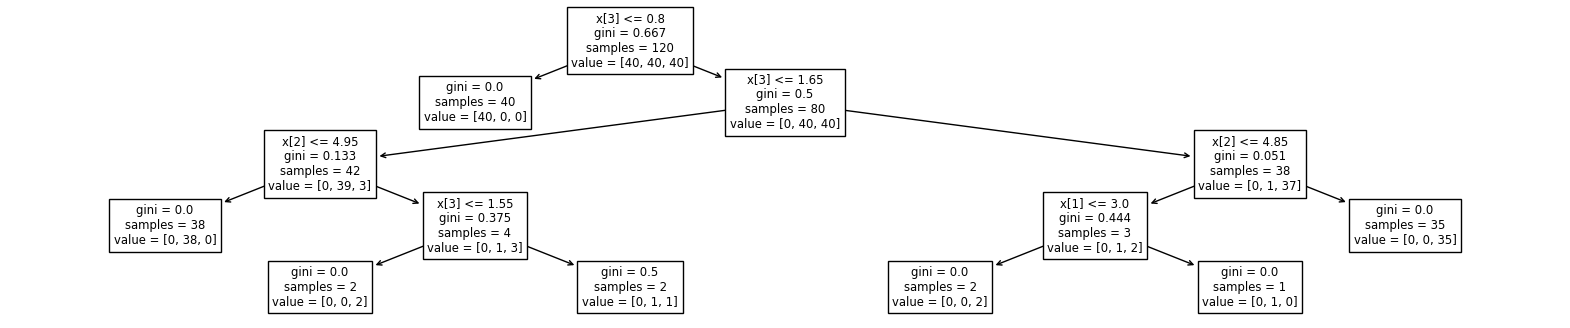

In [17]:
plt.figure(figsize=(20, 4))
tree.plot_tree(DT)
plt.show()

In [18]:
y_pred_prob = DT.predict_proba(X_test)
y_pred_prob

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [19]:
y_pred = DT.predict(X_test)
y_pred, y_pred.shape

(array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
        'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
       dtype=object),
 (30,))

In [20]:
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot: >

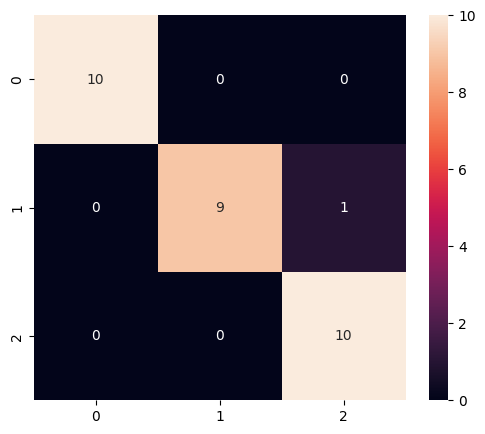

In [21]:
confuison_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confuison_matrix, annot=True)